# Hierarchical Clustering

A second clustering algorithm.

## What we will accomplish

In this notebook we will:
- Introduce the idea hierarchical clustering:
    - Learn about dendrograms and cut points and
- Show how to implement it with `scipy`:
    - Learn how to plot a dendrogram in python.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a dark background
set_style("whitegrid")

Hierarchical clustering is another technique for grouping $n$ observations of $m$ features stored in a matrix, $X$. A nice feature of hierarchical clustering, in comparison to $k$ means, is that we <i>do not</i> need to guess a number of clusters prior to fitting the algorithm. Instead we examine something known as a <i>dendrogram</i> and use that to make an informed choice after running the algorithm.

## The algorithm

In hierarchical clustering you start from each observation being its own cluster and slowly work your way to having every observation in a single cluster. This is done by combining clusters according to an inter-cluster distance measure that you determine prior to fitting the algorithm, let's call this $d$.

Starting from $d=0$ you slowly increase $d$ and when any pair of clusters are $d$ apart from one another you combine them. Let's demonstrate this with a few sketches.

<img src="bonus_content_assets/hclust1.png" width = "50%"></img>

<br>
<br>

<img src="bonus_content_assets/hclust2.png" width = "50%"></img>

<br>
<br>

<img src="bonus_content_assets/hclust3.png" width = "50%"></img>

<br>
<br>

<img src="bonus_content_assets/hclust4.png" width = "60%"></img>

This clustering information is then stored in a dendrogram:

<img src="bonus_content_assets/dendro.png" width = "35%"></img>

A variety of clusterings can then be selected depending on which distance you choose to make a cut point.

## In `scipy`

Rather than `sklearn` we will use `scipy` to perform hierarchical clustering, <a href="https://docs.scipy.org/">https://docs.scipy.org/</a>. 

Let's make a data set to demonstrate.

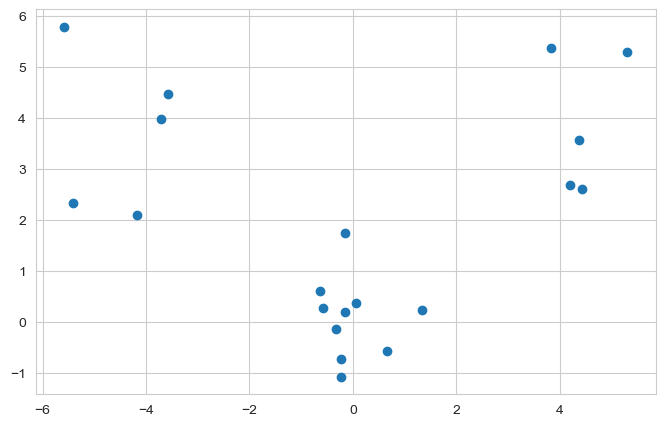

In [2]:
np.random.seed(323)
X = np.zeros((20,2))

X[:10,:] = np.random.randn(10,2)
X[10:15,:] = np.random.randn(5,2) + np.array([4,4])
X[15:,:] = np.random.randn(5,2) + np.array([-5,4])

plt.figure(figsize=(8,5))

plt.scatter(X[:,0],X[:,1])

plt.show()

`scipy` keeps its hierarchical clustering functions/objects in the `cluster.hierarchy` module. In particular we will want `dendrogram`, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html</a> and `linkage` <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html</a>.

In [3]:
## Import
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
## first we run linkage
## Put in the data, followed by the method
## we use method = 'single'
## this uses the minimum distance between points in clusters A and B
Z = linkage(X, method='single')

## this returns a numpy array that we will now describe
pd.DataFrame(Z, columns = ['cluster_1', 'cluster_2', 'distance', 'new_cluster_size'])

,cluster_1,cluster_2,distance,new_cluster_size
0,11.0,13.0,0.242044,2.0
1,0.0,1.0,0.279471,2.0
2,4.0,6.0,0.335536,2.0
3,2.0,5.0,0.351938,2.0
4,8.0,21.0,0.380168,3.0
5,22.0,24.0,0.430390,5.0
6,16.0,19.0,0.497312,2.0
7,23.0,25.0,0.586892,7.0
8,14.0,20.0,0.894893,3.0
9,3.0,27.0,0.896047,8.0


`linkage` returns an array that tracks everytime that two clusters merge, this is known as a linkage matrix.

<i>Note:</i> we can control how `linkage` measures the distance between clusters with the `method` argument. The default is `method='single'` which finds the minimum distance between any pair of points between two clusters. Other options include:
- `method='complete'`, which is the maximum distance between any pair of points between two clusters,
- `method='average'`, which is the average distance between any pair of points between two cluster,
- `method='centroid'`, which is the distance between the centroids of two clusters and
- `method='ward'`, which uses the Ward variance minimization algorithm.

Once we have the linkage matrix we can run `dendrogram` to plot the dendrogram.

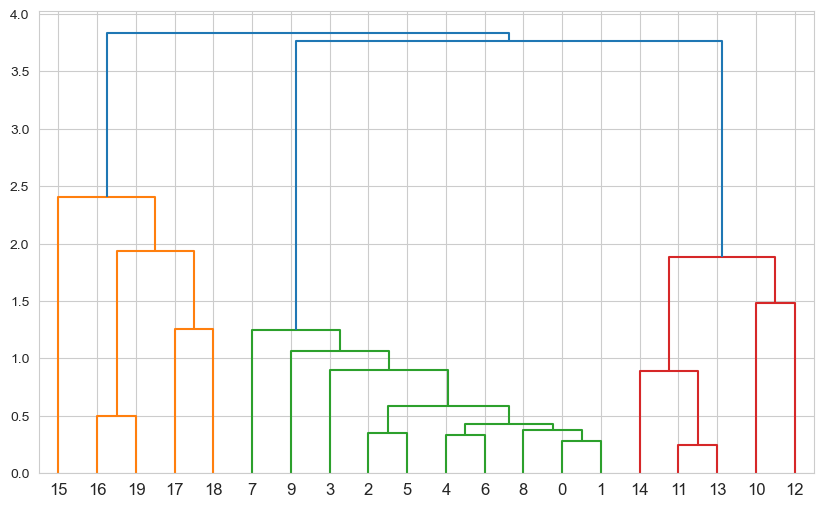

In [5]:
plt.figure(figsize=(10,6))

## This plots a dendrogram from the linkage matrix
dendrogram(Z)

plt.show()

Note that while the colors above seem like a reasonable clustering, it is important to note that this is a coincidence. In `dendrogram` there is an argument called `color_threshold` which colors the clusters according to the clustering at that cut point. The default value for this is `color_threshold = 0.7*max(Z[:,2])`, which is $0.7$ times the maximum merge distance in the linkage matrix. We demonstrate this below.

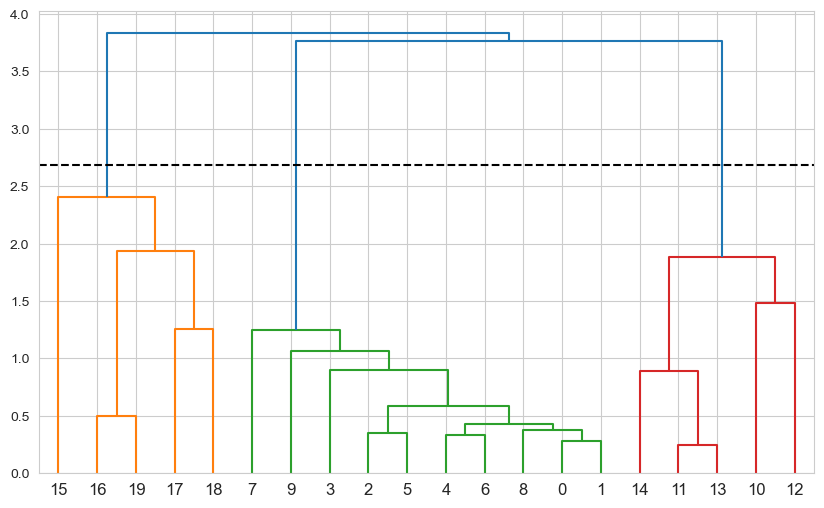

In [6]:
## The default color_threshold
plt.figure(figsize=(10,6))

dendrogram(Z)

plt.plot([0,200], 
         [0.7*max(Z[:,2]), 0.7*max(Z[:,2])], 
         'k--')

plt.show()

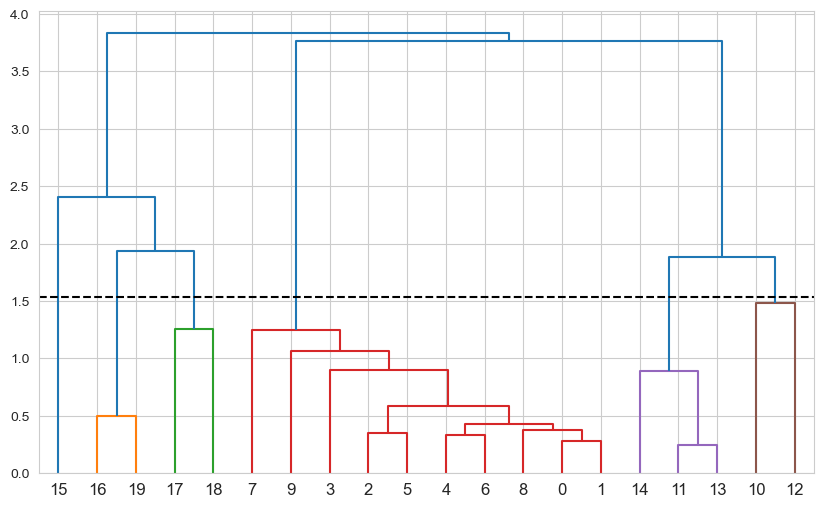

In [7]:
## A lower color_threshold
plt.figure(figsize=(10,6))

## What do we get with a different color_threshold .4*max(Z[:,2])?
dendrogram(Z, color_threshold =  0.4*max(Z[:,2]))

plt.plot([0,200], 
         [0.4*max(Z[:,2]), 0.4*max(Z[:,2])], 
         'k--')

plt.show()

Once you have a cutpoint you like, you need to actually get the cluster for each point. We do this with `fcluster`, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html</a>.

In [8]:
from scipy.cluster.hierarchy import fcluster

In [9]:
## get the clusters
## First put the linkage matrix
## then the cutoff point,
## then the criterion
## we use 'distance', which just uses the distance between points illustrated
## in the dendrograms above

clusters = fcluster(Z,  0.7*max(Z[:,2]), criterion='distance')


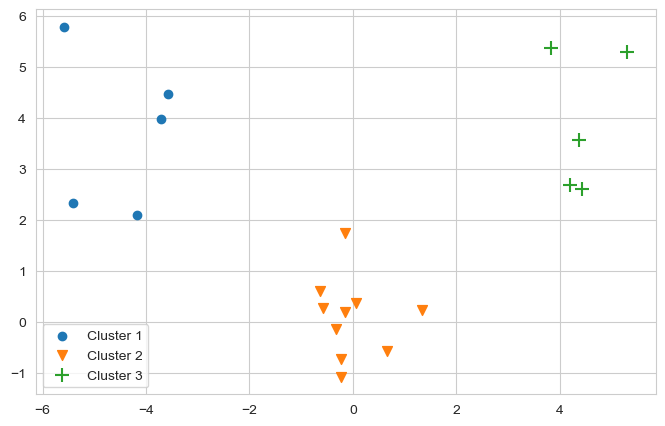

In [10]:
## Our corresponding clustering
plt.figure(figsize=(8,5))

plt.scatter(X[clusters == 1,0],
            X[clusters == 1,1],
            label="Cluster 1")

plt.scatter(X[clusters == 2,0],
            X[clusters == 2,1],
            marker = 'v',
            s = 50,
            label="Cluster 2")

plt.scatter(X[clusters == 3,0],
            X[clusters == 3,1],
            marker = '+',
            s = 100,
            label="Cluster 3")

plt.legend(fontsize=10)

plt.show()

Similar to $k$ means clustering we could use an inertia elbow plot or silhouette plots to help us determine what to set as our threshold value, but sometimes it is reasonable to just use a visual inspection. Looking at this particular dendrogram a threshold that produces three clusters looks reasonable.

Further, there may be other consideration that come from the particular problem on which you are working. For example, maybe you are working on a market segmentation problem for a business and additional market segments (clusters) can increase profit while also increasing cost. You would likely need to consider those which are external to whether the clustering is the "best" segmentation of the data.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)